<a href="https://colab.research.google.com/github/lesliederas/4105/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [ ]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Results without weight penalty:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


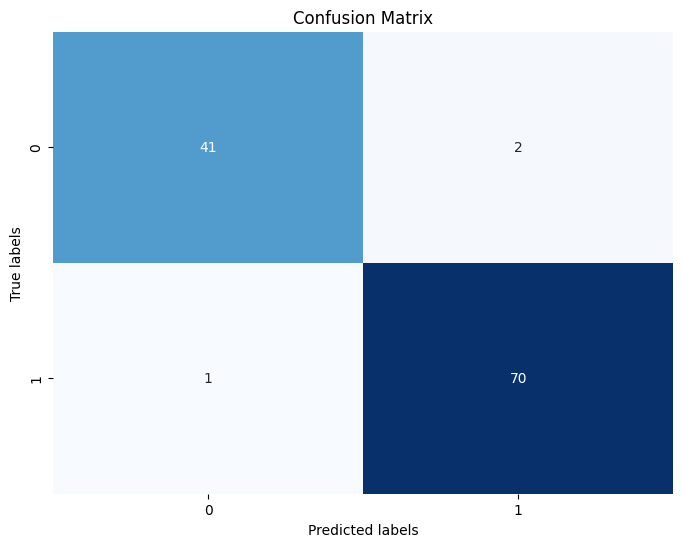

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

breast = load_breast_cancer()
X = breast.data
y = breast.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Results without weight penalty:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Results with weight penalty:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


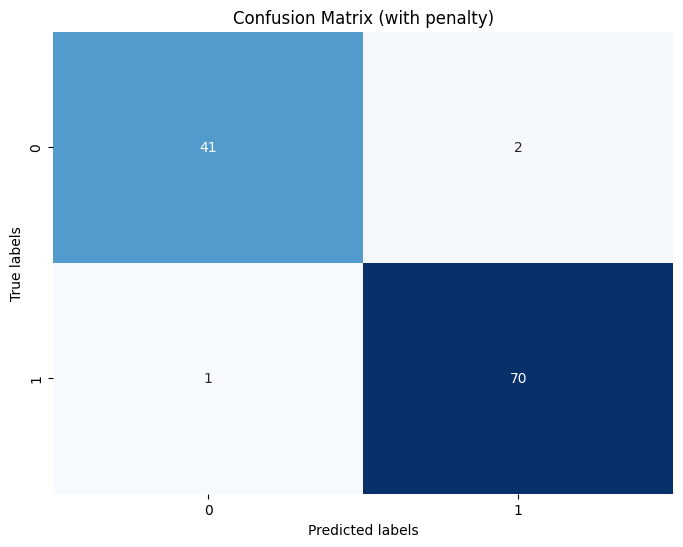

In [ ]:
logreg_penalty = LogisticRegression(penalty='l2')
logreg_penalty.fit(X_train_scaled, y_train)

y_pred_penalty = logreg_penalty.predict(X_test_scaled)

accuracy_penalty = accuracy_score(y_test, y_pred_penalty)
precision_penalty = precision_score(y_test, y_pred_penalty)
recall_penalty = recall_score(y_test, y_pred_penalty)

print("Results with weight penalty:")
print("Accuracy:", accuracy_penalty)
print("Precision:", precision_penalty)
print("Recall:", recall_penalty)

cm_penalty = confusion_matrix(y_test, y_pred_penalty)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_penalty, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (with penalty)')
plt.show()
